In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sb
from sklearn import preprocessing
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import pearsonr
from scipy.stats import spearmanr

In [2]:
# 1. reading the data
df=pd.read_csv("C:\\Users\Asus\Downloads\investors.csv")
df.head()

,Timestamp,Username,Which best describes your gender?,Age,What is your occupation?,What is your highest education level?,Do you invest in Investment Avenues?,What proportion of money you invest?,What do you think are the best options for investing your money? (Rank in order of preference) [Mutual Funds],What do you think are the best options for investing your money? (Rank in order of preference) [Equity Market],...,How often do you monitor your investments?,How much return do you expect from any investment instrument?,Which investment avenue do you mostly invest in?,What are your savings objectives?,Reasons for investing in Equity Market,Reasons for investing in Mutual Funds,What is your purpose behind investment?,Reasons for investing in Government Bonds,Reasons for investing in Fixed Deposits,Your major source of information for investment is
0,2023/04/09 9:14:59 PM GMT+5:30,NaN,Male,39,Salaried,Post Graduate,Yes,10% - 20%,3,3,...,Monthly,10% - 20%,Fixed Deposits,Retirement Plan,Power of compounding,Better Returns,Savings for retirement,Safe Investment,Fixed returns,Newspapers and Magazines
1,2023/04/09 9:25:23 PM GMT+5:30,NaN,Male,30,Salaried,Post Graduate,Yes,20% - 30%,3,6,...,Weekly,10% - 20%,Equity,Retirement Plan,Capital Appreciation,Better Returns,Wealth creation,Risk-free returns,Fixed returns,Internet
2,2023/04/09 9:34:18 PM GMT+5:30,NaN,Female,26,Salaried,Professional Degree,No,30% and above,7,4,...,Weekly,10% - 20%,Mutual Funds,Retirement Plan,Liquidity,Better Returns,Wealth creation,Risk-free returns,Fixed returns,Internet
3,2023/04/09 9:36:55 PM GMT+5:30,NaN,Male,32,Salaried,Post Graduate,Yes,10% - 20%,7,5,...,Monthly,10% - 20%,Mutual Funds,Retirement Plan,Capital Appreciation,Funds Diversification,Savings for retirement,Risk-free returns,Risk free,Internet
4,2023/04/09 9:37:42 PM GMT+5:30,NaN,Male,28,Salaried,Professional Degree,Yes,30% and above,4,6,...,Daily,10% - 20%,Equity,Retirement Plan,Capital Appreciation,Tax Benefits,Wealth creation,Tax Incentives,Fixed returns,Internet


In [3]:

df.tail()

,Timestamp,Username,Which best describes your gender?,Age,What is your occupation?,What is your highest education level?,Do you invest in Investment Avenues?,What proportion of money you invest?,What do you think are the best options for investing your money? (Rank in order of preference) [Mutual Funds],What do you think are the best options for investing your money? (Rank in order of preference) [Equity Market],...,How often do you monitor your investments?,How much return do you expect from any investment instrument?,Which investment avenue do you mostly invest in?,What are your savings objectives?,Reasons for investing in Equity Market,Reasons for investing in Mutual Funds,What is your purpose behind investment?,Reasons for investing in Government Bonds,Reasons for investing in Fixed Deposits,Your major source of information for investment is
127,2023/04/12 8:07:57 AM GMT+5:30,NaN,Male,25,Salaried,Post Graduate,Yes,20% - 30%,4,6,...,Monthly,10% - 20%,Fixed Deposits,Retirement Plan,Power of compounding,Tax Benefits,Hedging against inflation,Safe Investment,Fixed returns,Internet
128,2023/04/12 9:36:48 PM GMT+5:30,NaN,Female,42,Self-employed,Others,Yes,30% and above,3,6,...,Monthly,10% - 20%,Equity,Retirement Plan,Capital Appreciation,Tax Benefits,Wealth creation,Safe Investment,Fixed returns,Financial Consultant
129,2023/04/12 10:52:26 PM GMT+5:30,NaN,Male,30,Salaried,Post Graduate,No,5% - 10%,5,5,...,Daily,10% - 20%,Fixed Deposits,Retirement Plan,Dividend Income,Better Returns,Savings for retirement,Risk-free returns,High Interest Rates,Internet
130,2023/04/13 9:50:52 AM GMT+5:30,NaN,Female,33,Salaried,Post Graduate,Yes,20% - 30%,5,3,...,Monthly,10% - 20%,Mutual Funds,Retirement Plan,Capital Appreciation,Better Returns,Wealth creation,Risk-free returns,Fixed returns,Newspapers and Magazines
131,2023/04/13 7:26:53 PM GMT+5:30,NaN,Female,25,Student,Under Graduate,Yes,10% - 20%,4,5,...,Daily,10% - 20%,PPF - Public Provident Fund,Retirement Plan,Power of compounding,Funds Diversification,Returns,Risk-free returns,Fixed returns,Newspapers and Magazines


In [4]:
df.dtypes

Timestamp                                                                                                                              object
Username                                                                                                                              float64
Which best describes your gender?                                                                                                      object
Age                                                                                                                                     int64
What is your occupation?                                                                                                               object
What is your highest education level?                                                                                                  object
Do you invest in Investment Avenues?                                                                                                   object
What p

In [5]:
# 2. cleaning data
# 1. drop the useless rows and columns
# get the name of columns in a list
column_names = df.columns.values.tolist()
print(column_names)

['Timestamp', 'Username', 'Which best describes your gender?', 'Age', 'What is your occupation?', 'What is your highest education level?', 'Do you invest in Investment Avenues?', 'What proportion of money you invest?', 'What do you think are the best options for investing your money? (Rank in order of preference) [Mutual Funds]', 'What do you think are the best options for investing your money? (Rank in order of preference) [Equity Market]', 'What do you think are the best options for investing your money? (Rank in order of preference) [Corporate Bonds]', 'What do you think are the best options for investing your money? (Rank in order of preference) [Government Bonds]', 'What do you think are the best options for investing your money? (Rank in order of preference) [Fixed Deposits]', 'What do you think are the best options for investing your money? (Rank in order of preference) [PPF - Public Provident Fund]', 'What do you think are the best options for investing your money? (Rank in ord

In [6]:
df.drop(columns=['Timestamp','Username'], axis=1, inplace=True)

In [7]:
column_names1 = df.columns.values.tolist()
print(column_names1)

['Which best describes your gender?', 'Age', 'What is your occupation?', 'What is your highest education level?', 'Do you invest in Investment Avenues?', 'What proportion of money you invest?', 'What do you think are the best options for investing your money? (Rank in order of preference) [Mutual Funds]', 'What do you think are the best options for investing your money? (Rank in order of preference) [Equity Market]', 'What do you think are the best options for investing your money? (Rank in order of preference) [Corporate Bonds]', 'What do you think are the best options for investing your money? (Rank in order of preference) [Government Bonds]', 'What do you think are the best options for investing your money? (Rank in order of preference) [Fixed Deposits]', 'What do you think are the best options for investing your money? (Rank in order of preference) [PPF - Public Provident Fund]', 'What do you think are the best options for investing your money? (Rank in order of preference) [Gold /

In [8]:
pd.DataFrame(column_names1)

,0
0,Which best describes your gender?
1,Age
2,What is your occupation?
3,What is your highest education level?
4,Do you invest in Investment Avenues?
5,What proportion of money you invest?
6,What do you think are the best options for inv...
7,What do you think are the best options for inv...
8,What do you think are the best options for inv...
9,What do you think are the best options for inv...


In [9]:
df.rename(columns={'What proportion of money you invest?':'percent'}, inplace=True)

In [10]:
df

,Which best describes your gender?,Age,What is your occupation?,What is your highest education level?,Do you invest in Investment Avenues?,percent,What do you think are the best options for investing your money? (Rank in order of preference) [Mutual Funds],What do you think are the best options for investing your money? (Rank in order of preference) [Equity Market],What do you think are the best options for investing your money? (Rank in order of preference) [Corporate Bonds],What do you think are the best options for investing your money? (Rank in order of preference) [Government Bonds],...,How often do you monitor your investments?,How much return do you expect from any investment instrument?,Which investment avenue do you mostly invest in?,What are your savings objectives?,Reasons for investing in Equity Market,Reasons for investing in Mutual Funds,What is your purpose behind investment?,Reasons for investing in Government Bonds,Reasons for investing in Fixed Deposits,Your major source of information for investment is
0,Male,39,Salaried,Post Graduate,Yes,10% - 20%,3,3,3,3,...,Monthly,10% - 20%,Fixed Deposits,Retirement Plan,Power of compounding,Better Returns,Savings for retirement,Safe Investment,Fixed returns,Newspapers and Magazines
1,Male,30,Salaried,Post Graduate,Yes,20% - 30%,3,6,2,2,...,Weekly,10% - 20%,Equity,Retirement Plan,Capital Appreciation,Better Returns,Wealth creation,Risk-free returns,Fixed returns,Internet
2,Female,26,Salaried,Professional Degree,No,30% and above,7,4,3,3,...,Weekly,10% - 20%,Mutual Funds,Retirement Plan,Liquidity,Better Returns,Wealth creation,Risk-free returns,Fixed returns,Internet
3,Male,32,Salaried,Post Graduate,Yes,10% - 20%,7,5,2,4,...,Monthly,10% - 20%,Mutual Funds,Retirement Plan,Capital Appreciation,Funds Diversification,Savings for retirement,Risk-free returns,Risk free,Internet
4,Male,28,Salaried,Professional Degree,Yes,30% and above,4,6,4,3,...,Daily,10% - 20%,Equity,Retirement Plan,Capital Appreciation,Tax Benefits,Wealth creation,Tax Incentives,Fixed returns,Internet
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,Male,25,Salaried,Post Graduate,Yes,20% - 30%,4,6,6,7,...,Monthly,10% - 20%,Fixed Deposits,Retirement Plan,Power of compounding,Tax Benefits,Hedging against inflation,Safe Investment,Fixed returns,Internet
128,Female,42,Self-employed,Others,Yes,30% and above,3,6,2,7,...,Monthly,10% - 20%,Equity,Retirement Plan,Capital Appreciation,Tax Benefits,Wealth creation,Safe Investment,Fixed returns,Financial Consultant
129,Male,30,Salaried,Post Graduate,No,5% - 10%,5,5,4,5,...,Daily,10% - 20%,Fixed Deposits,Retirement Plan,Dividend Income,Better Returns,Savings for retirement,Risk-free returns,High Interest Rates,Internet
130,Female,33,Salaried,Post Graduate,Yes,20% - 30%,5,3,4,6,...,Monthly,10% - 20%,Mutual Funds,Retirement Plan,Capital Appreciation,Better Returns,Wealth creation,Risk-free returns,Fixed returns,Newspapers and Magazines


In [11]:
# country["Area (sq. km)"]=pd.to_numeric(country["Area (sq. km)"], errors="coerce")
#df["percent"]=pd.to_numeric(df["percent"], errors="coerce")
df['Age']=pd.to_numeric(df['Age'], errors='coerce')
df

,Which best describes your gender?,Age,What is your occupation?,What is your highest education level?,Do you invest in Investment Avenues?,percent,What do you think are the best options for investing your money? (Rank in order of preference) [Mutual Funds],What do you think are the best options for investing your money? (Rank in order of preference) [Equity Market],What do you think are the best options for investing your money? (Rank in order of preference) [Corporate Bonds],What do you think are the best options for investing your money? (Rank in order of preference) [Government Bonds],...,How often do you monitor your investments?,How much return do you expect from any investment instrument?,Which investment avenue do you mostly invest in?,What are your savings objectives?,Reasons for investing in Equity Market,Reasons for investing in Mutual Funds,What is your purpose behind investment?,Reasons for investing in Government Bonds,Reasons for investing in Fixed Deposits,Your major source of information for investment is
0,Male,39,Salaried,Post Graduate,Yes,10% - 20%,3,3,3,3,...,Monthly,10% - 20%,Fixed Deposits,Retirement Plan,Power of compounding,Better Returns,Savings for retirement,Safe Investment,Fixed returns,Newspapers and Magazines
1,Male,30,Salaried,Post Graduate,Yes,20% - 30%,3,6,2,2,...,Weekly,10% - 20%,Equity,Retirement Plan,Capital Appreciation,Better Returns,Wealth creation,Risk-free returns,Fixed returns,Internet
2,Female,26,Salaried,Professional Degree,No,30% and above,7,4,3,3,...,Weekly,10% - 20%,Mutual Funds,Retirement Plan,Liquidity,Better Returns,Wealth creation,Risk-free returns,Fixed returns,Internet
3,Male,32,Salaried,Post Graduate,Yes,10% - 20%,7,5,2,4,...,Monthly,10% - 20%,Mutual Funds,Retirement Plan,Capital Appreciation,Funds Diversification,Savings for retirement,Risk-free returns,Risk free,Internet
4,Male,28,Salaried,Professional Degree,Yes,30% and above,4,6,4,3,...,Daily,10% - 20%,Equity,Retirement Plan,Capital Appreciation,Tax Benefits,Wealth creation,Tax Incentives,Fixed returns,Internet
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,Male,25,Salaried,Post Graduate,Yes,20% - 30%,4,6,6,7,...,Monthly,10% - 20%,Fixed Deposits,Retirement Plan,Power of compounding,Tax Benefits,Hedging against inflation,Safe Investment,Fixed returns,Internet
128,Female,42,Self-employed,Others,Yes,30% and above,3,6,2,7,...,Monthly,10% - 20%,Equity,Retirement Plan,Capital Appreciation,Tax Benefits,Wealth creation,Safe Investment,Fixed returns,Financial Consultant
129,Male,30,Salaried,Post Graduate,No,5% - 10%,5,5,4,5,...,Daily,10% - 20%,Fixed Deposits,Retirement Plan,Dividend Income,Better Returns,Savings for retirement,Risk-free returns,High Interest Rates,Internet
130,Female,33,Salaried,Post Graduate,Yes,20% - 30%,5,3,4,6,...,Monthly,10% - 20%,Mutual Funds,Retirement Plan,Capital Appreciation,Better Returns,Wealth creation,Risk-free returns,Fixed returns,Newspapers and Magazines


In [12]:
## Renaming the multiple columns
columns_rename_mapping= {
    'Which best describes your gender?':'Gender',
    'What is your occupation?':'Occupation',
    'What is your highest education level?':'Education_level',
    'Do you invest in Investment Avenues?':'Investment_avenues',
    'What proportion of money you invest?':'Proportion_invest',
    "What do you think are the best options for investing your money? (Rank in order of preference) [Mutual Funds]":'Mutual_funds',
    "What do you think are the best options for investing your money? (Rank in order of preference) [Equity Market]":'Equity_market',
    "What do you think are the best options for investing your money? (Rank in order of preference) [Corporate Bonds]":'Corporate_bonds',
    "What do you think are the best options for investing your money? (Rank in order of preference) [Government Bonds]":"G_secs",
    "What do you think are the best options for investing your money? (Rank in order of preference) [Fixed Deposits]":'FD',
        "What do you think are the best options for investing your money? (Rank in order of preference) [PPF - Public Provident Fund]":'PPF',
    "What do you think are the best options for investing your money? (Rank in order of preference) [Gold / Sovereign Gold Bonds - SGB]":'Gold/SGB',
    'Do you invest in Stock market?':'Invest_stocks',
    'What are the factors considered by you while investing in any instrument?':'Factors_investment',
    'What is your investment objective?':'Investment_objective',
    'How long do you prefer to keep your money in any investment instrument?':'Duration',
    'How often do you monitor your investments?':'Investment_monitor',
    'How much return do you expect from any investment instrument?':'Expected_return',
    'Which investment avenue do you mostly invest in?':'Preferred_avenue',
    'What are your savings objectives?':'Savings_objective',
    'Reasons for investing in Equity Market':'Reason_equity',
    'Reasons for investing in Mutual Funds':'Reason_MF',
    'What is your purpose behind investment?':'Purpose_investment',
    'Reasons for investing in Government Bonds':'Reason_Gsec',
    'Reasons for investing in Fixed Deposits':'Reason_FD',
    'Your major source of information for investment is':'Source'
}
df.rename(columns=columns_rename_mapping, inplace=True)

In [13]:
df.head()

,Gender,Age,Occupation,Education_level,Investment_avenues,percent,Mutual_funds,Equity_market,Corporate_bonds,G_secs,...,Investment_monitor,Expected_return,Preferred_avenue,Savings_objective,Reason_equity,Reason_MF,Purpose_investment,Reason_Gsec,Reason_FD,Source
0,Male,39,Salaried,Post Graduate,Yes,10% - 20%,3,3,3,3,...,Monthly,10% - 20%,Fixed Deposits,Retirement Plan,Power of compounding,Better Returns,Savings for retirement,Safe Investment,Fixed returns,Newspapers and Magazines
1,Male,30,Salaried,Post Graduate,Yes,20% - 30%,3,6,2,2,...,Weekly,10% - 20%,Equity,Retirement Plan,Capital Appreciation,Better Returns,Wealth creation,Risk-free returns,Fixed returns,Internet
2,Female,26,Salaried,Professional Degree,No,30% and above,7,4,3,3,...,Weekly,10% - 20%,Mutual Funds,Retirement Plan,Liquidity,Better Returns,Wealth creation,Risk-free returns,Fixed returns,Internet
3,Male,32,Salaried,Post Graduate,Yes,10% - 20%,7,5,2,4,...,Monthly,10% - 20%,Mutual Funds,Retirement Plan,Capital Appreciation,Funds Diversification,Savings for retirement,Risk-free returns,Risk free,Internet
4,Male,28,Salaried,Professional Degree,Yes,30% and above,4,6,4,3,...,Daily,10% - 20%,Equity,Retirement Plan,Capital Appreciation,Tax Benefits,Wealth creation,Tax Incentives,Fixed returns,Internet


In [14]:
# summary of Data Frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132 entries, 0 to 131
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Gender                132 non-null    object
 1   Age                   132 non-null    int64 
 2   Occupation            132 non-null    object
 3   Education_level       132 non-null    object
 4   Investment_avenues    132 non-null    object
 5   percent               132 non-null    object
 6   Mutual_funds          132 non-null    int64 
 7   Equity_market         132 non-null    int64 
 8   Corporate_bonds       132 non-null    int64 
 9   G_secs                132 non-null    int64 
 10  FD                    132 non-null    int64 
 11  PPF                   132 non-null    int64 
 12  Gold/SGB              132 non-null    int64 
 13  Invest_stocks         132 non-null    object
 14  Factors_investment    132 non-null    object
 15  Investment_objective  132 non-null    ob

In [15]:
## Checking null values
df.isna().sum()

Gender                  0
Age                     0
Occupation              0
Education_level         0
Investment_avenues      0
percent                 0
Mutual_funds            0
Equity_market           0
Corporate_bonds         0
G_secs                  0
FD                      0
PPF                     0
Gold/SGB                0
Invest_stocks           0
Factors_investment      0
Investment_objective    0
Duration                0
Investment_monitor      0
Expected_return         0
Preferred_avenue        0
Savings_objective       0
Reason_equity           0
Reason_MF               0
Purpose_investment      0
Reason_Gsec             0
Reason_FD               0
Source                  0
dtype: int64

In [16]:
## Checking duplicate values
df.duplicated().sum()

0

In [17]:
# numeric columns
df.describe()

,Age,Mutual_funds,Equity_market,Corporate_bonds,G_secs,FD,PPF,Gold/SGB
count,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000
mean,32.992424,4.795455,4.537879,3.416667,4.090909,4.113636,4.772727,4.492424
std,10.924792,1.860553,1.775169,1.548413,1.758098,1.839547,1.859947,1.696409
min,18.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,25.750000,4.000000,3.000000,2.000000,3.000000,3.000000,4.000000,3.000000
50%,30.000000,5.000000,5.000000,4.000000,4.000000,4.000000,5.000000,5.000000
75%,37.250000,7.000000,6.000000,4.000000,5.000000,6.000000,6.250000,6.000000
max,70.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000


In [18]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
127    False
128    False
129    False
130    False
131    False
Length: 132, dtype: bool

In [19]:
df.drop_duplicates()
df.shape

(132, 27)

Text(0.5, 1.0, 'Distributions')

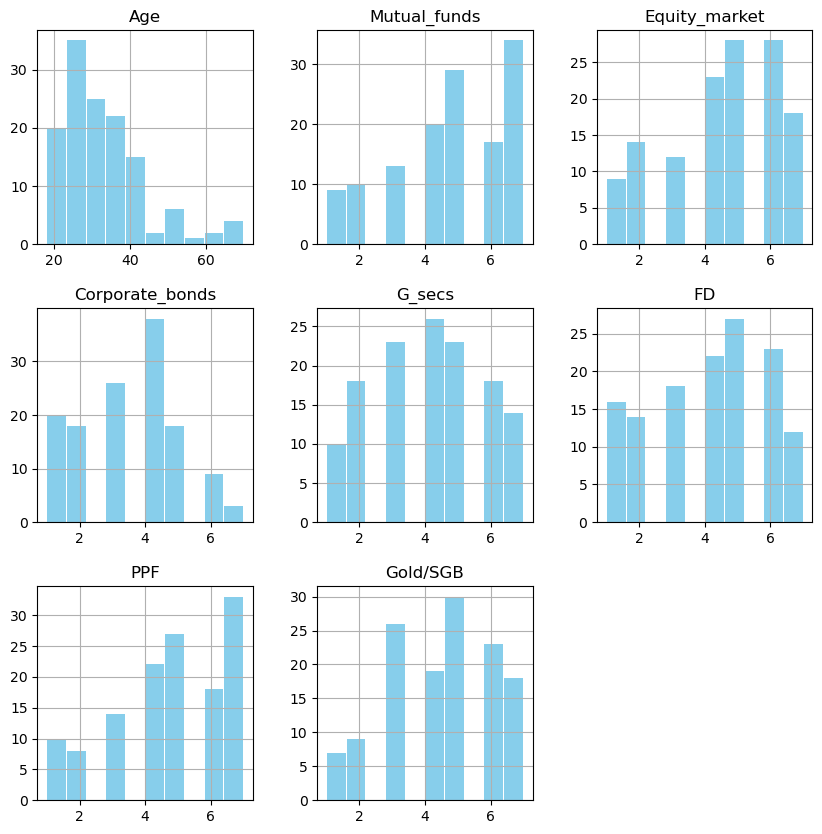

In [20]:
## Distribution visualization of Numeric columns

df.hist(figsize=(10,10), color='skyblue', rwidth=0.95)
plt.title('Distributions')

C:\Users\Asus\descktop\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Age Distribution')

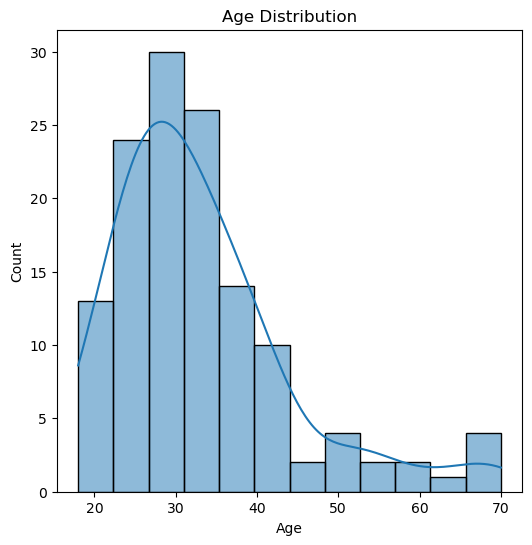

In [21]:
## Histogram of Age
plt.figure(figsize=(6,6))
sb.histplot(df['Age'], kde=True)
plt.title('Age Distribution')

In [22]:
# most of our participants are around 26 to 32 years old (either late 20s our in beginning of their 30s)

C:\Users\Asus\descktop\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Occupation Distribution')

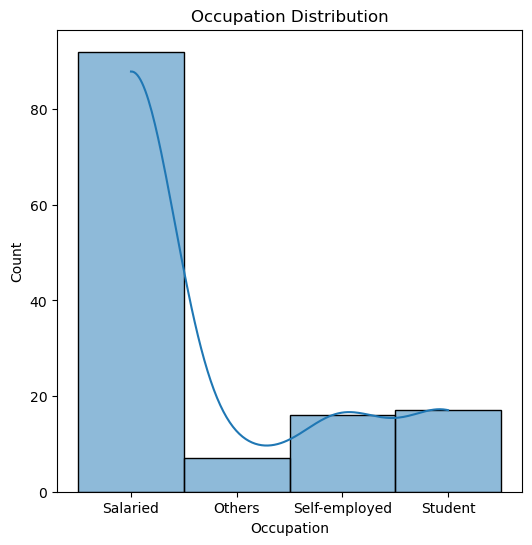

In [23]:
plt.figure(figsize=(6,6))
sb.histplot(df['Occupation'], kde=True)
plt.title('Occupation Distribution')

In [24]:
# most of our participants are salaried

In [25]:
#looking for somthing more than 0.5
p_coeff, p_value=spearmanr(df.Age, df.Occupation)
p_coeff

-0.2856394997358038

In [26]:
p_coeff, p_value=spearmanr(df.Age, df.Mutual_funds)
p_coeff

0.017073644814115402

In [27]:
set(df.Source)

{'Financial Consultant', 'Internet', 'Newspapers and Magazines', 'Television'}

In [28]:
set(df.Expected_return)

{'10% - 20%', '20% and above', '5% - 10%'}

In [29]:
set(df.Education_level)

{'Others', 'Ph. D', 'Post Graduate', 'Professional Degree', 'Under Graduate'}

In [35]:
per=set(df.percent)
per

{'10% - 20%', '20% - 30%', '30% and above', '5% - 10%'}

In [31]:
source_ExpRe = df.loc[:, ['Source', 'Expected_return']]
print(source_ExpRe)

                       Source Expected_return
0    Newspapers and Magazines       10% - 20%
1                    Internet       10% - 20%
2                    Internet       10% - 20%
3                    Internet       10% - 20%
4                    Internet       10% - 20%
..                        ...             ...
127                  Internet       10% - 20%
128      Financial Consultant       10% - 20%
129                  Internet       10% - 20%
130  Newspapers and Magazines       10% - 20%
131  Newspapers and Magazines       10% - 20%

[132 rows x 2 columns]


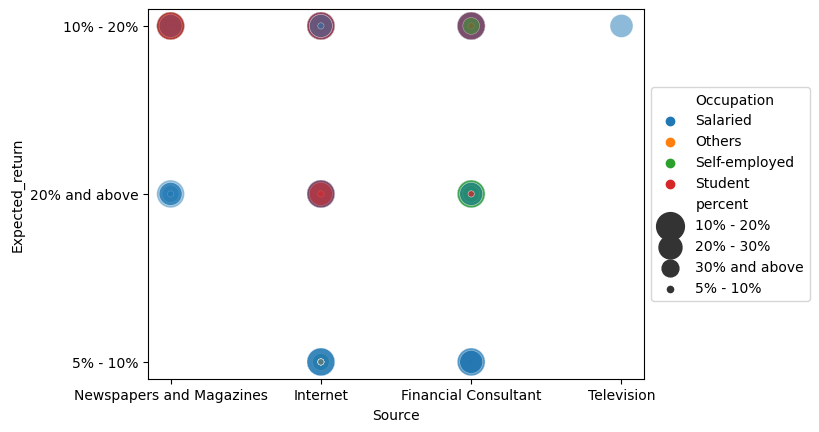

In [32]:
sb.scatterplot(
    data=df,
    x='Source',
    y='Expected_return',
    size='percent',
    hue='Occupation',
    alpha=0.5,
    sizes=(20, 400)
)

plt.legend(loc='center left', bbox_to_anchor=(1,0.5))

plt.show()

In [33]:
# students people tend to expect more return on their investments